In [1]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
# A function that will be used later in assessing the model performance
def model_performance(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)   
    print("\n---------------Test data results---------------")
    test_report_df = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
    print(f"Precision: {precision_score(y_test, y_test_pred)}")
    print(f"Recall: {recall_score(y_test, y_test_pred)}")
    print(f"Classification Report:\n{test_report_df}")

First, lets import our Empoltee Attrition dataset.

The dataset used here can be find in kaggle: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [3]:
df = pd.read_csv("HR Employee Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
#cate_var = ["BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","Over18","OverTime"]
#for col in cate_var:
#    df[col] = df[col].astype('category')

Now we check for some statistics about the data

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


Let us also check if we have any missing values in our dataset. If we see any of them, we need to fix them before doing any analysis.

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We see no missing values in any column. Let's check the unique values in each column.

In [8]:
for col in df:
    len_val = int(df[col].nunique())
    print(f"Variable {col} has {len_val} unique values")
    print(df[col].dtypes)
    print(df[col].unique())
    if  len_val == 1 :
        print(f"*** Problematic variable *** ")
    if len_val > 20 and df[col].dtypes == "category":
        print(f"*** Problematic variable *** ")
    print("========================")

Variable Age has 43 unique values
int64
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Variable Attrition has 2 unique values
object
['Yes' 'No']
Variable BusinessTravel has 3 unique values
object
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Variable DailyRate has 886 unique values
int64
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  

We remove the categorical variable which only have one unique value because they do not provide any information for our model. We also drop the Employee Number since it is used as an index and it does not give any useful information.

In [9]:
print(f"Before droping the columns {df.shape}")
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)
print(f"After droping the columns {df.shape}")

Before droping the columns (1470, 35)
After droping the columns (1470, 31)


## Exploratory analysis

In [10]:
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})
df['BusinessTravel'] = df['BusinessTravel'].map({'Travel_Rarely': 0, 'Travel_Frequently': 1,'Non-Travel': 2})
df['Department'] = df['Department'].map({'Sales':0, 'Research & Development': 1, 'Human Resources': 2})
df['EducationField'] = df['EducationField'].map({'Life Sciences':0, 'Other': 1, 'Medical': 2, 'Marketing': 3,'Technical Degree': 4, 'Human Resources':5})
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['JobRole'] = df['JobRole'].map({'Sales Executive': 0, 'Research Scientist': 1,'Laboratory Technician':2,'Manufacturing Director':3,
                              'Healthcare Representative':4,'Manager':5 , 'Sales Representative':6, 'Research Director':7 ,'Human Resources':8 })
df['OverTime'] = df['OverTime'].map({'Yes': 0, 'No': 1})
df['MaritalStatus'] = df['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced':2})


In [11]:
df.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

First, we will look at the distribution of the targer variable.

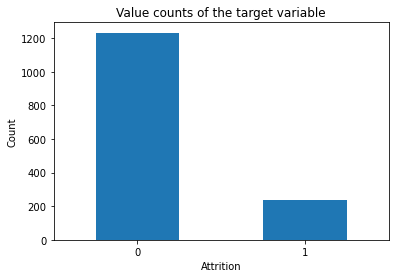

In [12]:
df["Attrition"].value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Attrition")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

We do a check for the categorical variables

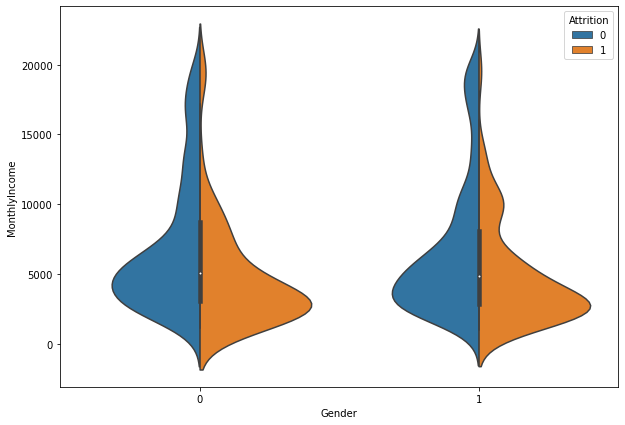

In [13]:
fig,ax = plt.subplots(figsize=(10,7))
sns.violinplot(x='Gender', y='MonthlyIncome',hue='Attrition',split=True,data=df)
plt.show()

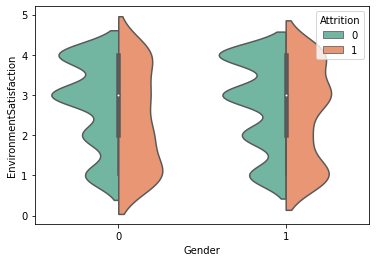

In [14]:
sns.violinplot(x='Gender', y='EnvironmentSatisfaction',hue='Attrition',split=True,palette = "Set2",data=df)
plt.show()

Now we check the continouse variables

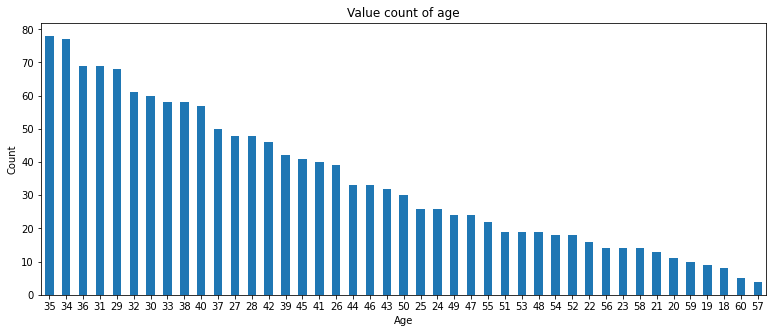

In [15]:
plt.figure(figsize=(13,5))
df.Age.value_counts().sort_values(ascending=False).plot(kind="bar")
plt.title("Value count of age")
plt.xlabel("Age")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [16]:
np.abs(df.corr())["Attrition"].sort_values(ascending=False)[1:10]


OverTime                0.246118
TotalWorkingYears       0.171063
JobLevel                0.169105
MaritalStatus           0.162070
YearsInCurrentRole      0.160545
MonthlyIncome           0.159840
Age                     0.159205
YearsWithCurrManager    0.156199
StockOptionLevel        0.137145
Name: Attrition, dtype: float64

In [17]:
highly_corr = ['Attrition',"TotalWorkingYears", "JobLevel","MaritalStatus","YearsInCurrentRole","OverTime"]

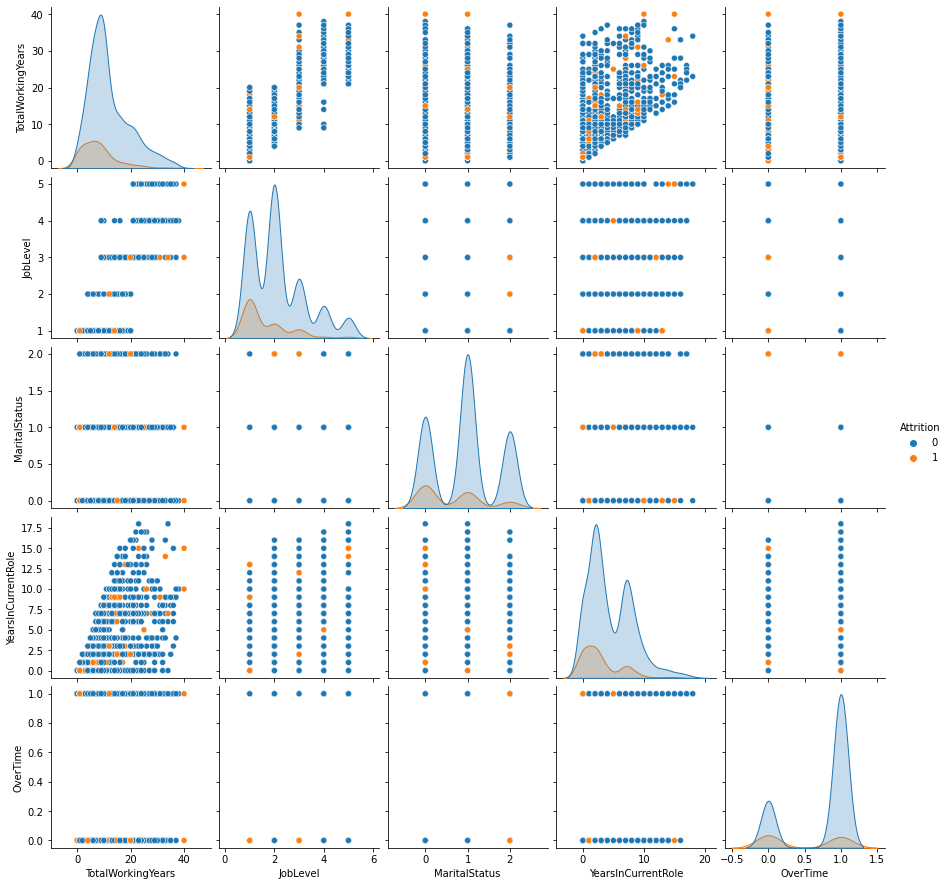

In [18]:
sns.pairplot(df[highly_corr],hue='Attrition')
plt.show()

<AxesSubplot:>

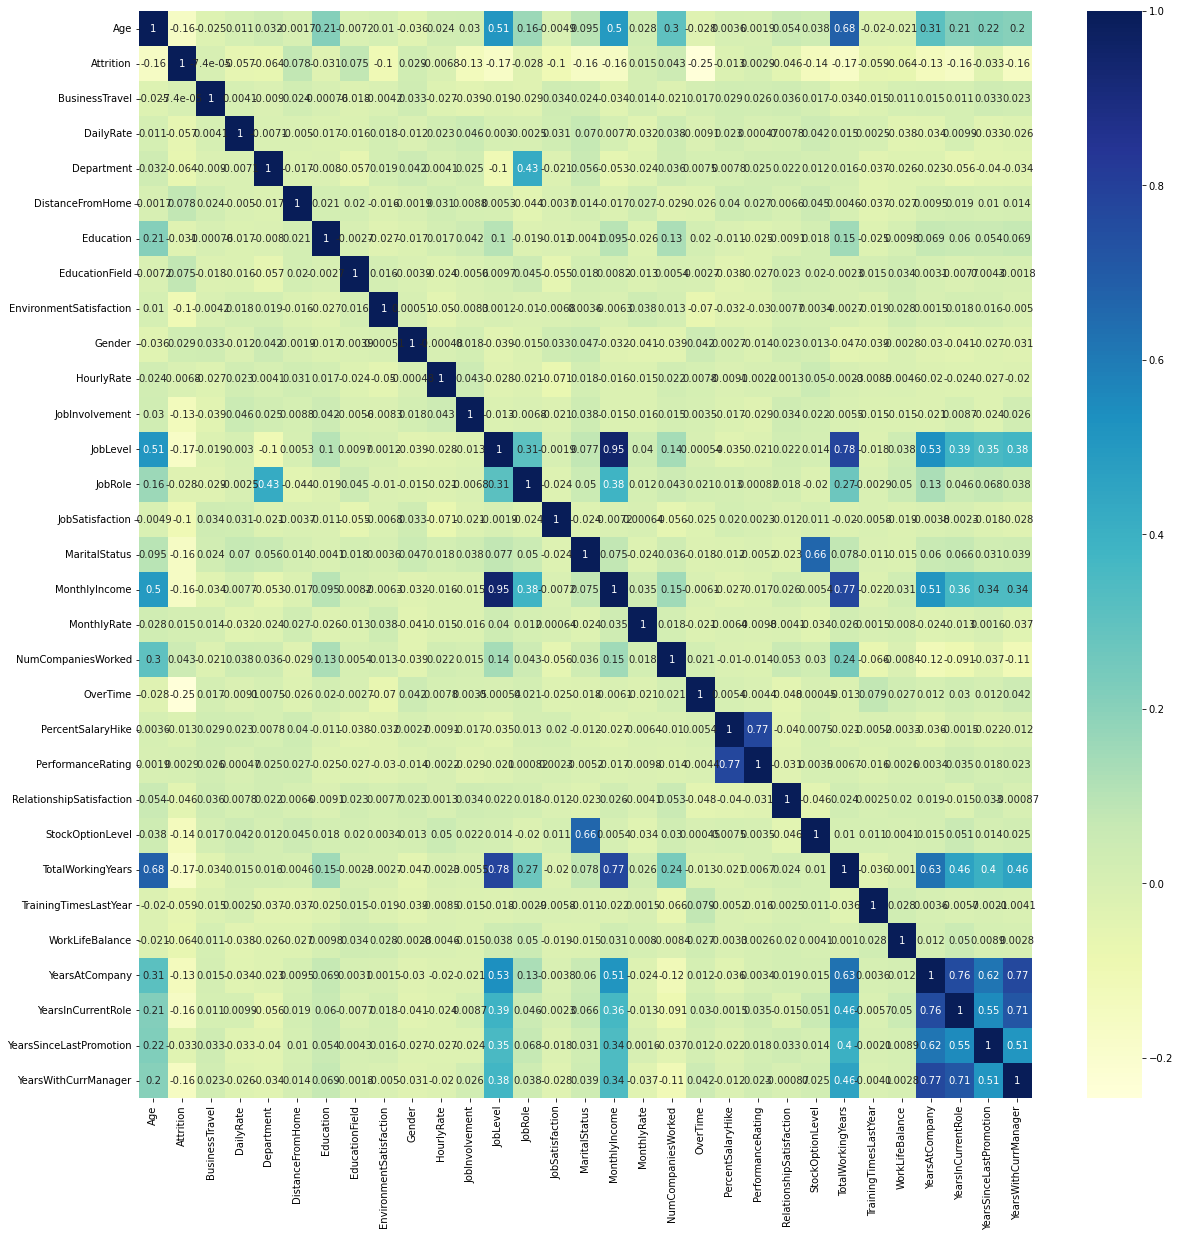

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

Monthly income and Job level correlates too high (with corr = 0.95). We will remove one of these variables.

In [20]:
print(f"Before droping the columns {df.shape}")
df.drop(['JobLevel'], axis="columns", inplace=True)
print(f"After droping the columns {df.shape}")

Before droping the columns (1470, 31)
After droping the columns (1470, 30)


## Modeling

In [21]:
# Set a seed
np.random.seed(1337)

In [22]:
cate_var = ["BusinessTravel","Department","Education","EducationField","Gender","JobInvolvement","JobRole","MaritalStatus","OverTime","PerformanceRating",
           "RelationshipSatisfaction","StockOptionLevel","WorkLifeBalance"]

df= pd.get_dummies(df, columns= cate_var)

In [23]:
num_var = ["Age","DailyRate","DistanceFromHome","HourlyRate","MonthlyIncome","MonthlyRate","NumCompaniesWorked","PercentSalaryHike","TotalWorkingYears",
         "TrainingTimesLastYear","YearsAtCompany","YearsInCurrentRole"]

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_var] = scaler.fit_transform(df[num_var])

In [25]:
y = df["Attrition"]
X = df.drop(columns=["Attrition"])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.20, 
                                   shuffle=True)

In [27]:
X_train.shape

(1176, 67)

### Logistic regression

In [28]:
logistic_regression_model = LogisticRegression(solver = "liblinear", penalty = "l1", random_state = 60)
logistic_regression_model.fit(X_train, y_train)
model_performance(logistic_regression_model, X_train, X_test, y_train, y_test)


---------------Test data results---------------
Confusion Matrix:
[[231  11]
 [ 26  26]]
Accuracy: 0.8741496598639455
Precision: 0.7027027027027027
Recall: 0.5
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.898833   0.702703   0.87415    0.800768      0.864143
recall       0.954545   0.500000   0.87415    0.727273      0.874150
f1-score     0.925852   0.584270   0.87415    0.755061      0.865436
support    242.000000  52.000000   0.87415  294.000000    294.000000


### Random Forest

In [29]:
random_forest_model = RandomForestClassifier(random_state = 42)
random_forest_model.fit(X_train, y_train)
model_performance(random_forest_model, X_train, X_test, y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1))


---------------Test data results---------------
Confusion Matrix:
[[239   3]
 [ 41  11]]
Accuracy: 0.8503401360544217
Precision: 0.7857142857142857
Recall: 0.21153846153846154
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.853571   0.785714   0.85034    0.819643      0.841569
recall       0.987603   0.211538   0.85034    0.599571      0.850340
f1-score     0.915709   0.333333   0.85034    0.624521      0.812704
support    242.000000  52.000000   0.85034  294.000000    294.000000


### Naive Bayes

In [30]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
model_performance(gnb, X_train, X_test, y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1))


---------------Test data results---------------
Confusion Matrix:
[[180  62]
 [ 11  41]]
Accuracy: 0.7517006802721088
Precision: 0.39805825242718446
Recall: 0.7884615384615384
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.942408   0.398058  0.751701    0.670233      0.846129
recall       0.743802   0.788462  0.751701    0.766132      0.751701
f1-score     0.831409   0.529032  0.751701    0.680221      0.777927
support    242.000000  52.000000  0.751701  294.000000    294.000000


### SVM

In [31]:
svm_model = SVC(kernel = "rbf", random_state = 42)
svm_model.fit(X_train, y_train)
model_performance(svm_model, X_train, X_test, y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1))


---------------Test data results---------------
Confusion Matrix:
[[242   0]
 [ 44   8]]
Accuracy: 0.8503401360544217
Precision: 1.0
Recall: 0.15384615384615385
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.846154   1.000000   0.85034    0.923077      0.873365
recall       1.000000   0.153846   0.85034    0.576923      0.850340
f1-score     0.916667   0.266667   0.85034    0.591667      0.801701
support    242.000000  52.000000   0.85034  294.000000    294.000000


## Conclusion

we ran 4 different algorithms to assess if employees have attrition. Since the dataset is highly unbalanced, it is not wise to look at accuracy as a performance metric. To assess which model performed the best we can look at the precision, recall or f1-score metrics. Since f1-score is an hormonic mean of precision and recall it will bring an optimal balance of the former two metrics and we will look at this to assess the best model.

Logistic regression: 0.584270
Random forest: 0.333333
Naive Bayes: 0.529032
SVM: 0.266667

Logistic regression seem to have the highest F1-score for actual Attrition cases.